In [1]:

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

from sklearn.linear_model import LinearRegression 
from sklearn.model_selection import train_test_split

from matplotlib import pyplot as plt 

In [2]:
%matplotlib notebook

In [3]:
data1 = pd.read_csv('chocolate.csv')
data1

,Unnamed: 0,ref,company,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,...,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
0,0,2454,5150,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
1,1,2458,5150,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
2,2,2454,5150,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
3,3,797,A. Morin,France,2012,Peru,Peru,63.0,3.75,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
4,4,797,A. Morin,France,2012,Bolivia,Bolivia,70.0,3.50,4,...,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2219,2219,1205,Zotter,Austria,2014,Blend,Raw,80.0,2.75,4,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_salt,have_not_sugar,have_sweetener_without_sugar,waxy,cloying,vegetal,NaN
2220,2220,1996,Zotter,Austria,2017,Colombia,"APROCAFA, Acandi",75.0,3.75,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,strong nutty,marshmallow,NaN,NaN
2221,2221,2170,Zotter,Austria,2018,Belize,Maya Mtn,72.0,3.50,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,muted,roasty,accessible,NaN
2222,2222,2170,Zotter,Austria,2018,Congo,Mountains of the Moon,70.0,3.25,3,...,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fatty,mild nuts,mild fruit,NaN


In [4]:
data1.columns

Index(['Unnamed: 0', 'ref', 'company', 'company_location', 'review_date',
       'country_of_bean_origin', 'specific_bean_origin_or_bar_name',
       'cocoa_percent', 'rating', 'counts_of_ingredients', 'beans',
       'cocoa_butter', 'vanilla', 'lecithin', 'salt', 'sugar',
       'sweetener_without_sugar', 'first_taste', 'second_taste', 'third_taste',
       'fourth_taste'],
      dtype='object')

In [5]:
data1.set_index('company', inplace = True)
data1.head()

,Unnamed: 0,ref,company_location,review_date,country_of_bean_origin,specific_bean_origin_or_bar_name,cocoa_percent,rating,counts_of_ingredients,beans,cocoa_butter,vanilla,lecithin,salt,sugar,sweetener_without_sugar,first_taste,second_taste,third_taste,fourth_taste
company,,,,,,,,,,,,,,,,,,,,
5150,0,2454,U.S.A,2019,Madagascar,"Bejofo Estate, batch 1",76.0,3.75,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,blackberry,full body,NaN
5150,1,2458,U.S.A,2019,Dominican republic,"Zorzal, batch 1",76.0,3.50,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,cocoa,vegetal,savory,NaN
5150,2,2454,U.S.A,2019,Tanzania,"Kokoa Kamili, batch 1",76.0,3.25,3,have_bean,have_cocoa_butter,have_not_vanila,have_not_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,rich cocoa,fatty,bready,NaN
A. Morin,3,797,France,2012,Peru,Peru,63.0,3.75,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,fruity,melon,roasty,NaN
A. Morin,4,797,France,2012,Bolivia,Bolivia,70.0,3.50,4,have_bean,have_cocoa_butter,have_not_vanila,have_lecithin,have_not_salt,have_sugar,have_not_sweetener_without_sugar,vegetal,nutty,NaN,NaN


<IPython.core.display.Javascript object>


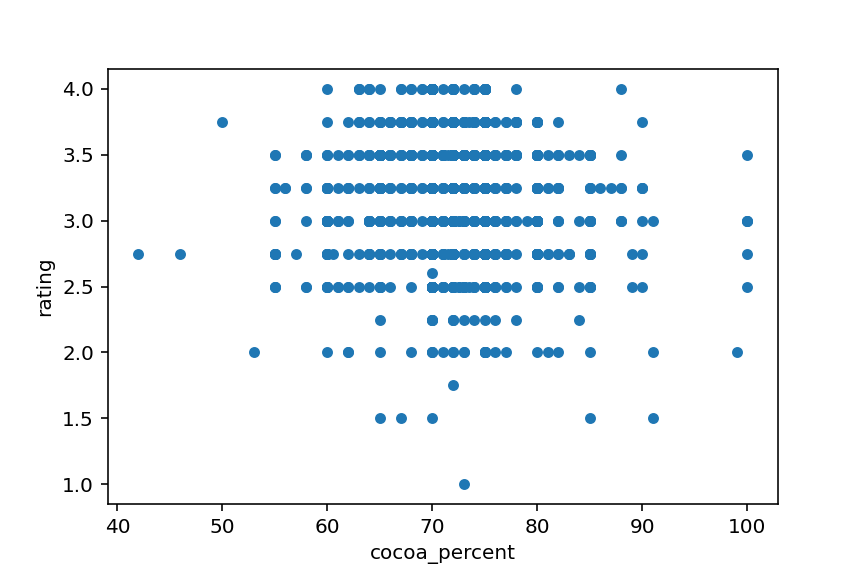

In [6]:
data1.plot(kind='scatter', x='cocoa_percent', y='rating')
plt.show()

<IPython.core.display.Javascript object>


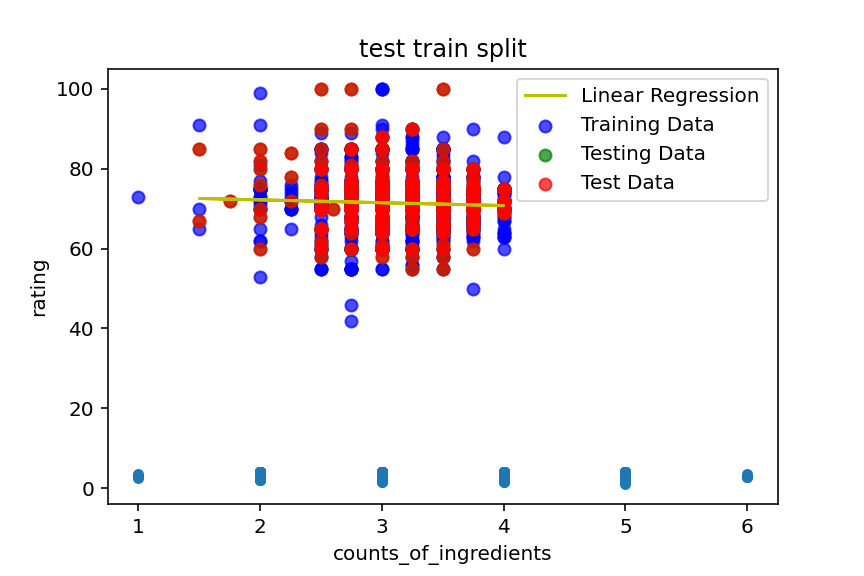

In [7]:
data1.plot(kind='scatter', x='counts_of_ingredients', y='rating')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(data1.rating, data1.cocoa_percent)

In [9]:
plt.scatter(X_train, y_train, label = 'Training Data', color ='b', alpha=.7)
plt.scatter(X_test, y_test, label = 'Testing Data', color ='g', alpha=.7)
plt.legend()
plt.title('test train split')
plt.show()

In [10]:
LR = LinearRegression()
LR.fit(X_train.values.reshape(-1,1), y_train.values)

LinearRegression()

In [11]:
prediction = LR.predict(X_test.values.reshape(-1,1))
plt.plot (X_test, prediction, label='Linear Regression', color='y')
plt.scatter(X_test, y_test, label= "Test Data", color='r', alpha=.7)
plt.legend()
plt.show()

In [12]:
LR.predict(np.array([[3.0]]))[0]

71.49431007074804

In [13]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2224 entries, 5150 to Zotter
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Unnamed: 0                        2224 non-null   int64  
 1   ref                               2224 non-null   int64  
 2   company_location                  2224 non-null   object 
 3   review_date                       2224 non-null   int64  
 4   country_of_bean_origin            2224 non-null   object 
 5   specific_bean_origin_or_bar_name  2224 non-null   object 
 6   cocoa_percent                     2224 non-null   float64
 7   rating                            2224 non-null   float64
 8   counts_of_ingredients             2224 non-null   int64  
 9   beans                             2224 non-null   object 
 10  cocoa_butter                      2224 non-null   object 
 11  vanilla                           2224 non-null   object 
 12  lecith

In [14]:
data1.describe()

,Unnamed: 0,ref,review_date,cocoa_percent,rating,counts_of_ingredients
count,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000,2224.000000
mean,1111.500000,1337.010342,2013.857914,71.493930,3.198561,3.075989
std,642.157821,693.959768,3.582151,5.278253,0.434329,0.929875
min,0.000000,5.000000,2006.000000,42.000000,1.000000,1.000000
25%,555.750000,776.000000,2011.000000,70.000000,3.000000,2.000000
50%,1111.500000,1381.000000,2014.000000,70.000000,3.250000,3.000000
75%,1667.250000,1928.000000,2016.000000,74.000000,3.500000,4.000000
max,2223.000000,2490.000000,2020.000000,100.000000,4.000000,6.000000


<IPython.core.display.Javascript object>


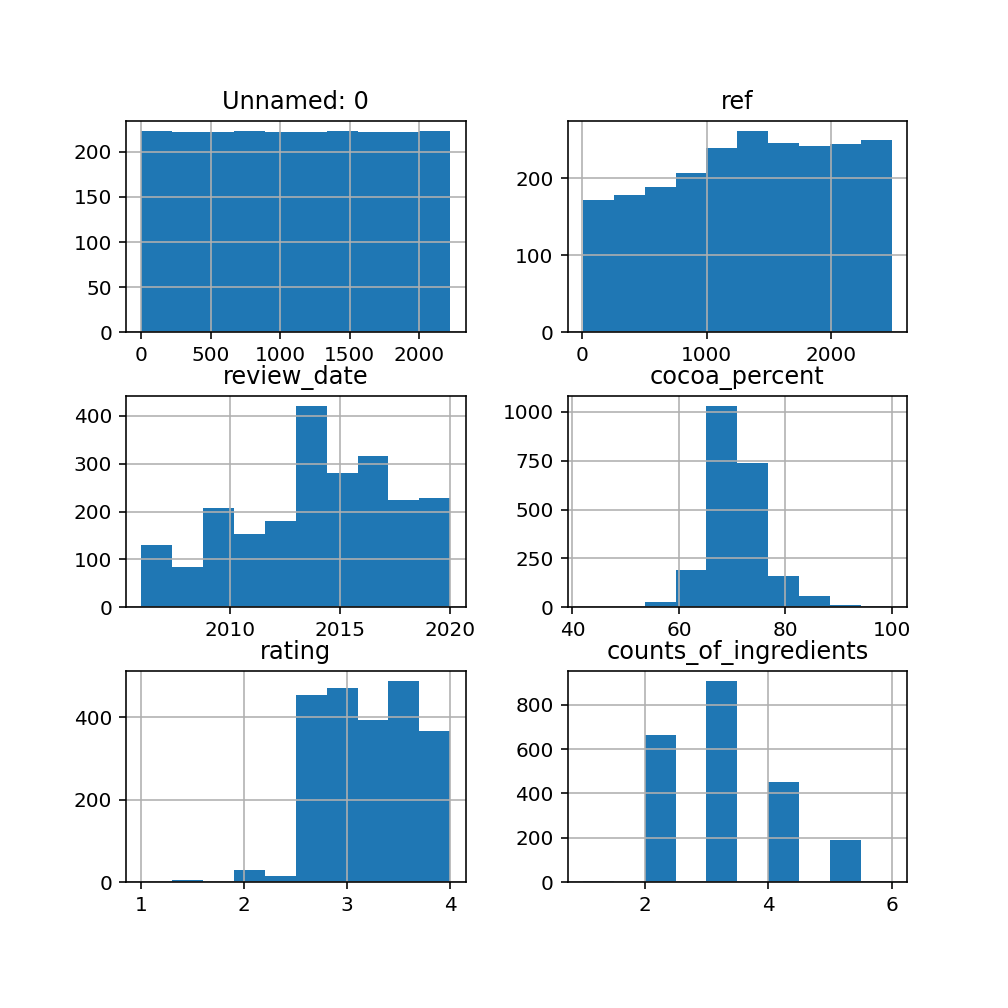

In [15]:
data1.hist(figsize=(7,7))
plt.show()

<IPython.core.display.Javascript object>


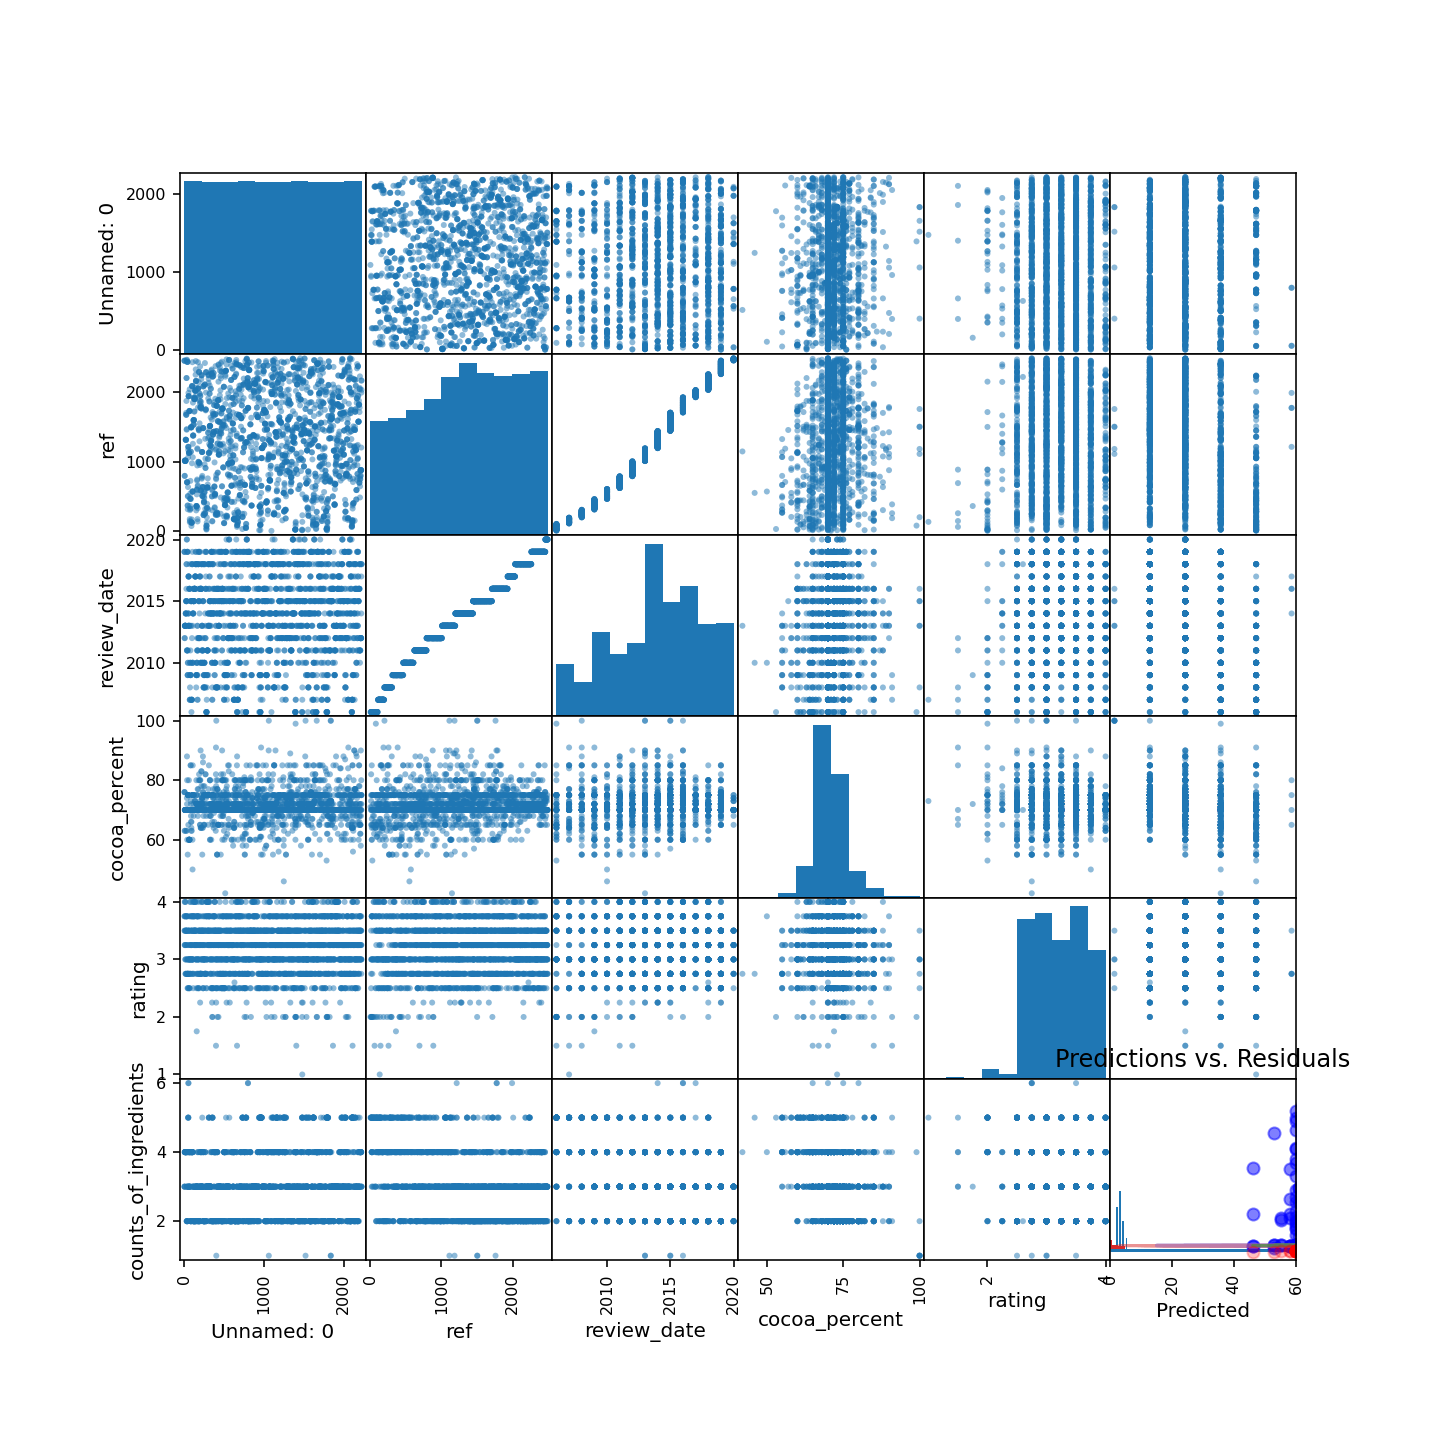

In [16]:
pd.plotting.scatter_matrix(data1, figsize=(10,10))
plt.show()

In [17]:
from sklearn.model_selection import train_test_split

In [18]:
df = data1.columns[:-1]
X_train,X_test, y_train, y_test = train_test_split(data1[df], data1['cocoa_percent'],
                                                  test_size=0.25,
                                                  random_state=50
                                                  )
print(f'Training : {X_train.shape[0]}')
print(f'Test : {X_test.shape[0]}')

Training : 1668
Test : 556


In [19]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

polys = ['rating', 'review_date']
non_polys = ['counts_of_ingredients']

poly_pipeline = Pipeline([('add_polynomials', PolynomialFeatures(3, include_bias=False)),
                           ('standardize_poly', StandardScaler())
                        ])

processing_pipeline = ColumnTransformer(transformers=[('poly_processing', poly_pipeline, polys),
                                ('nonpoly_scaling', StandardScaler(), non_polys)
                               ])

print(processing_pipeline)


ColumnTransformer(transformers=[('poly_processing',
                                 Pipeline(steps=[('add_polynomials',
                                                  PolynomialFeatures(degree=3,
                                                                     include_bias=False)),
                                                 ('standardize_poly',
                                                  StandardScaler())]),
                                 ['rating', 'review_date']),
                                ('nonpoly_scaling', StandardScaler(),
                                 ['counts_of_ingredients'])])


In [20]:
from sklearn.linear_model import LinearRegression

modeling_pipeline = Pipeline([('data_processing', processing_pipeline), ('lm', LinearRegression())])
modeling_pipeline.fit(X_train, y_train)

Pipeline(steps=[('data_processing',
                 ColumnTransformer(transformers=[('poly_processing',
                                                  Pipeline(steps=[('add_polynomials',
                                                                   PolynomialFeatures(degree=3,
                                                                                      include_bias=False)),
                                                                  ('standardize_poly',
                                                                   StandardScaler())]),
                                                  ['rating', 'review_date']),
                                                 ('nonpoly_scaling',
                                                  StandardScaler(),
                                                  ['counts_of_ingredients'])])),
                ('lm', LinearRegression())])

In [21]:
modeling_pipeline['lm'].coef_

array([-3.81071331e+04, -5.38184855e+03,  2.63336237e+03,  7.34119887e+04,
        9.94133541e+03,  1.09564742e+01, -2.65479144e+03, -3.52991573e+04,
       -4.57904379e+03, -9.04575638e-01])

## traning the data 

In [22]:
modeling_pipeline.score(X_train, y_train)

0.05205753558083881

## Testing the data 

In [23]:
modeling_pipeline.score(X_test, y_test)

0.0372926399484127

In [24]:
import matplotlib

In [31]:
y_prediction = modeling_pipeline.predict(X_test)



In [33]:
plt.plot(y_test, y_prediction,  alpha=0.5)
plt.xlabel('Actual_presentation')
plt.ylabel('Predicted_dataset')
plt.show()

In [35]:

y_residuals = y_test - y_prediction

plt.hist(y_residuals, bins=25)
plt.title('Residual Distribution')
plt.show()

In [36]:
plt.plot(y_test, y_residuals, 'ro', alpha=0.25)
plt.hlines(0,0,60)
plt.xlim(0,60)
plt.title('Predictions vs. Residuals')
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.show()